# Homework

1) Calculate and plot the ratio F(n)/F(n-1) with respect to n using memorization method. 

2) 

    a) Use the Recursion method, Tabulation method,  and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, … uniform in the log space). (caution: recursion method will break when n>100)

    b) For each method, output the time and n into a file
       
    c) Read from the file and plot log(time) (y-axis) vs. log(n) (x-axis) for different methods. 
       
    d) Discuss the complexity of each method.


<h3>1. Fibonacci ratios using memorization method</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fib_memorization(n, table):
    
    # BASE CASE: First two elements of table are always 0 and 1, respectively.
    if n == 0 or n == 1:
        table[n] = n
        
    # INDUCTIVE STEP: For n > 1, if the nth element of table is None then set it to the 
    # sum of the two elements before it. 
    if table[n] == None:
        table[n] = fib_memorization(n-1,table) + fib_memorization(n-2,table)
    
    return table[n]

n= 2 	ratio= 1.0
n= 3 	ratio= 2.0
n= 4 	ratio= 1.5
n= 5 	ratio= 1.6666666666666667
n= 6 	ratio= 1.6
n= 7 	ratio= 1.625
n= 8 	ratio= 1.6153846153846154
n= 9 	ratio= 1.619047619047619
n= 10 	ratio= 1.6176470588235294
n= 11 	ratio= 1.6181818181818182
n= 12 	ratio= 1.6179775280898876
n= 13 	ratio= 1.6180555555555556
n= 14 	ratio= 1.6180257510729614
n= 15 	ratio= 1.6180371352785146
n= 16 	ratio= 1.618032786885246
n= 17 	ratio= 1.618034447821682
n= 18 	ratio= 1.6180338134001253
n= 19 	ratio= 1.618034055727554


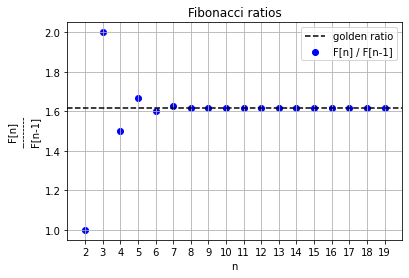

In [3]:
ns = np.arange(2,20)
fib_ratios = []

# populate fib_ratios with F[n]/F[n-1] for each n in ns and print the ratios
for n in ns:
    blank_table = [None]*(n+1)
    fib_ratios.append(fib_memorization(n, blank_table) / fib_memorization(n-1, blank_table))
    print('n=', n, '\tratio=', fib_ratios[n-2])
    
plt.plot([ns[0]-1,ns[-1]+1], [(1+np.sqrt(5))/2]*2, 'k--', label='golden ratio')  # plot golden ratio
plt.scatter(ns, fib_ratios, c='b', label='F[n] / F[n-1]')  # plot fibonacci ratios
plt.title('Fibonacci ratios')
plt.xlim(ns[0]-1,ns[-1]+1)
plt.xticks(ns)
plt.xlabel('n')
plt.ylabel('F[n]\n---------\nF[n-1]')
plt.legend()
plt.grid()
plt.show()

<h3>2. Fibonacci sequence time comparison (recursion vs. tabulation vs. matrix)

In [4]:
from time import time
import os

In [5]:
def fib_recursion(n):
    
    # BASE CASE: First two elements of fibonacci sequence are 0 and 1, respectively. 
    if n == 0 or n == 1:
        return n
    
    # INDUCTIVE STEP: For n > 1, the nth element is the sum of the previous two elements. 
    return fib_recursion(n-1) + fib_recursion(n-2)

def fib_tabulation(n):
    
    # INITIALIZE TABLE: First two elements of table are 0 and 1, respectively. 
    table = [0]*(n+1)
    table[1] = 1
    
    # SUCCESSIVE STEP: Calculate the next element of table by summing the previous two 
    # elements and repeat til table is filled to the nth element. 
    for i in range(2, n+1):
        table[i] = table[i-1] + table[i-2]
    return table[n]

def fib_matrix(n):
    
    init_arr = [[1,1],   # F[2] F[1]
                [1,0]]   # F[1] F[0]
    
    def arr_power(n):
        
        # For first two elements, automically return array that results in the 
        # fibonacci number 0 or 1, accordingly. 
        if n == -1 or n == 0:
            return [[n+1,0],[0,0]]
        
        # BASE CASE: (init_arr)^1 = init_arr
        if n == 1:
            return init_arr
        
        # INDUCTIVE STEP: (init_arr)^n = [(init_arr)^(n//2)] ^ 2 * (init_arr)^(n%2). 
        res = arr_power(n//2)
        res = [[res[0][0]*res[0][0]+res[0][1]*res[1][0],res[0][0]*res[0][1]+res[0][1]*res[1][1]],
               [res[1][0]*res[0][0]+res[1][1]*res[1][0],res[1][0]*res[0][1]+res[1][1]*res[1][1]]]
        if n%2 == 1:
            res = [[res[0][0]*init_arr[0][0]+res[0][1]*init_arr[1][0],res[0][0]*init_arr[0][1]+res[0][1]*init_arr[1][1]],
                   [res[1][0]*init_arr[0][0]+res[1][1]*init_arr[1][0],res[1][0]*init_arr[0][1]+res[1][1]*init_arr[1][1]]]
        return res

    return arr_power(n-1)[0][0]

In [6]:
n_min_power = 0  # min n = 10^(n_min_power)
n_max_power = 8  # max n = 10^(n_max_power)

# delete current file of times
file_path_name = r'./fibonacci_times.txt'
if os.path.exists(file_path_name):
    os.remove(file_path_name)

# create new file of times
with open(file_path_name, 'w') as file:
    
    file.write('n | recursion time (s) | tabulation time (s) | matrix time (s)\n')
    
    # times that are too long default to None
    for n in np.logspace(n_min_power, n_max_power, 20).astype('int'):
        if n < 40:
            start_time = time()
            fib_recursion(n)
            rec_time = time()-start_time
        else:
            rec_time = None
        
        if n < 8e5:
            start_time = time()
            fib_tabulation(n)
            tab_time = time()-start_time
        else:
            tab_time = None
        
        if n < 7e7:
            start_time = time()
            fib_matrix(n)
            mat_time = time()-start_time
        else:
            mat_time = None
        
        file.write('{} {} {} {}\n'.format(n, rec_time, tab_time, mat_time))
        

In [7]:
# read from file of times and store the values as floats or None
with open(file_path_name, 'r') as file:
    
    file.readline()
    lines = []
    ns = []
    rec_times = []
    tab_times = []
    mat_times = []
    for line in file:
        line = line.strip().split()
        
        ns.append(int(line[0]))
        
        try:
            rec_times.append(float(line[1]))
        except ValueError:
            rec_times.append(None)
        
        try:
            tab_times.append(float(line[2]))
        except ValueError:
            tab_times.append(None)
            
        try:
            mat_times.append(float(line[3]))
        except ValueError:
            mat_times.append(None)
    
print(ns)
print(rec_times)
print(tab_times)
print(mat_times)

[1, 2, 6, 18, 48, 127, 335, 885, 2335, 6158, 16237, 42813, 112883, 297635, 784759, 2069138, 5455594, 14384498, 37926901, 100000000]
[2.86102294921875e-06, 5.9604644775390625e-06, 3.719329833984375e-05, 0.009575128555297852, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
[8.821487426757812e-06, 5.0067901611328125e-06, 5.9604644775390625e-06, 2.5033950805664062e-05, 1.71661376953125e-05, 4.506111145019531e-05, 0.00013518333435058594, 0.00038909912109375, 0.0015628337860107422, 0.004562854766845703, 0.02245783805847168, 0.06798005104064941, 0.3564589023590088, 2.3366589546203613, 72.66204595565796, None, None, None, None, None]
[7.867813110351562e-06, 3.814697265625e-06, 2.5987625122070312e-05, 4.1961669921875e-05, 3.814697265625e-05, 4.363059997558594e-05, 5.125999450683594e-05, 6.914138793945312e-05, 0.0001227855682373047, 0.00021791458129882812, 0.0006420612335205078, 0.0015082359313964844, 0.006649971008300781, 0.031942129135131836, 0.1

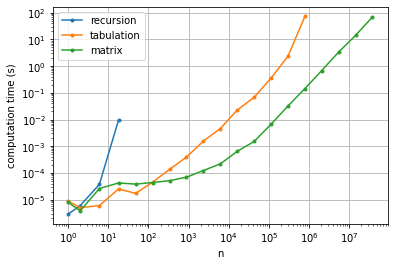

In [8]:
plt.plot(ns, rec_times, linestyle='-', marker='.', label='recursion')
plt.plot(ns, tab_times, linestyle='-', marker='.', label='tabulation')
plt.plot(ns, mat_times, linestyle='-', marker='.', label='matrix')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('computation time (s)')
plt.legend()
plt.grid()

<h4>Recursion: O(2<sup>n</sup>)</h4>
Since each call of <code>fib_recursion</code> calls the same function two more times, then for large n, the number of operations performed is on the order of 2<sup>n</sup>. This is shown in the log-log graph as an exponential growth. 

<h4>Tabulation: O(n)</h4>
Starting from the first two fibonacci numbers and calculating the next successive terms from the previous two is akin to how one would calculate fibonacci numbers by hand. Thus, for n > 1, <code>fib_tabulation</code> performs n-1 summations to obtain the nth fibonacci number. This should appear as a linear function on a log-log graph, but the graph above seems to be showing a more exponential growth (or maybe quadratic). 

<h4>Matrix: O(log<sub>2</sub>n)</h4>
The matrix method takes n-1 powers of a 2x2 matrix in order to compute the nth fibonacci number. Since powers can be computed by repeatedly taking half the power, <code>fib_matrix</code> computes around log<sub>2</sub>(n-1) matrix multiplications. Hence, the graph should appear to be logarithmic on a log-log plot, but the graph above, instead, shows a more linear plot for n > 10<sup>5</sup>.

I'm not sure where the discrepency between the theoretical and experimental time complexity for the tabulation and matrix method comes from. Perhaps there's not enough points to demonstrate the long term behaviour of these algorithms, or something 